In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
ruta = 'C:/Users/pepe2/Documents/QuackRepository/Quack/Ciencia_de_Redes/soc-youtube.mtx'

datos = pd.read_csv(ruta,
            # usecols=[0,1],
            skiprows=2,
            header=None,
            )
datos

,0
0,2 1
1,3 1
2,4 1
3,5 1
4,6 1
...,...
1936743,495777 495776
1936744,495800 495799
1936745,495845 495844
1936746,495884 495883


In [10]:
G = nx.from_pandas_edgelist(datos, source = 0, target = 1)

In [11]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de tu red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)
print('\nEl coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:\n', p)

Propiedades generales de tu red:
- El número de nodos es:	 11
- El número de enlaces es:	 10
- El grado promedio es:		 1.8181818181818181


El coeficiente de clustering promedio de la red es:
 0.0

El coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:
 0.18181818181818182


### Pregunta 1

**¿Consideras que el modelo de red aleatoria se ajusta a la red real que estás utilizando?**

*Yo creo que sí se acerca mucho a lo que realmente nuestra red real esta representando porque el grado de clustering promedio de nuestra red es de 0 el cálculo del clustering como si fuese aleatoria la red es de 0.18*


## 2.1.3.2. DIstribución de grado

In [19]:
# se generan los diccionarios
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

In [21]:
# se genera el dataframe (la tabla)
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df

,Degree,Clustering
0,10,0
7061,1,0
5911,1,0
13203,1,0
13704,1,0
11031,1,0
2095,1,0
10340,1,0
2801,1,0
970,1,0


In [23]:
df.Degree.values

array([10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [25]:
K = df.Degree.max()
K

10

In [26]:
y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)

In [28]:
from scipy.stats import poisson

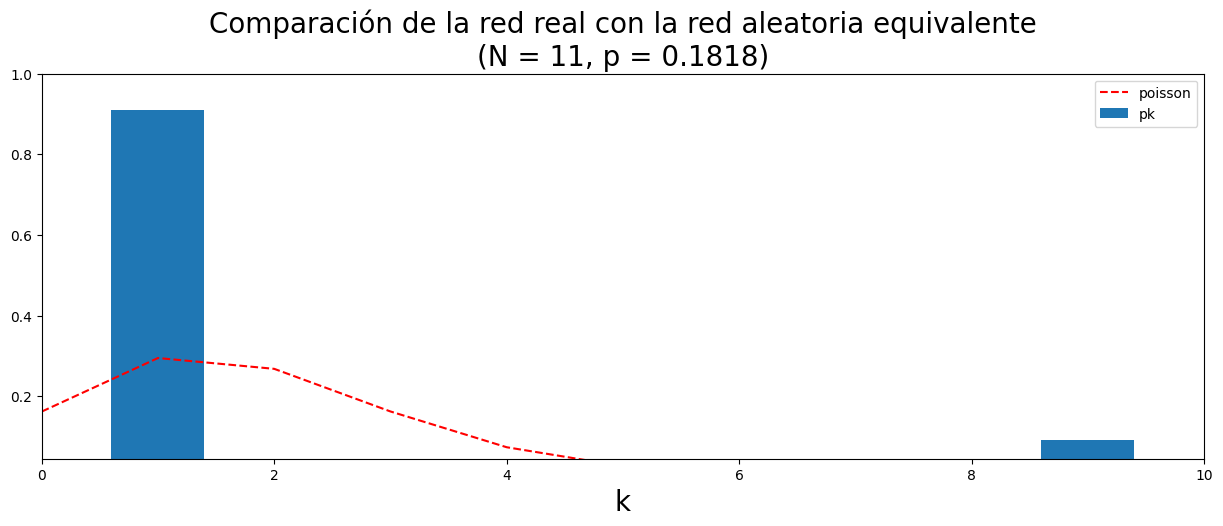

In [30]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,x.max()])
plt.xlabel('k', size = 20)
plt.legend()
plt.show()

### Pregunta 2

**¿Consideras que la distribución de grado de la red aleatoria correspondiente se ajusta a la distribución de grado de la red real que estás analizando?**

*En esta red escogida el hecho de que haya poca variedad de en grados de distribución dificulta un poco el análisis, sin embargo sí se puede apreciar como a pesar de la poca variedad, la manera enla que se distribuye poisson muestra enorme similitud con el grado real de nuestra red.*



## Código para redes MUY grandes

No se puede apreciar debido a que la red escogida es muy pequeña

In [ ]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = 'Pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])
plt.legend()

plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

plt.show()

## 2.1.3.3. Clustering de los nodos

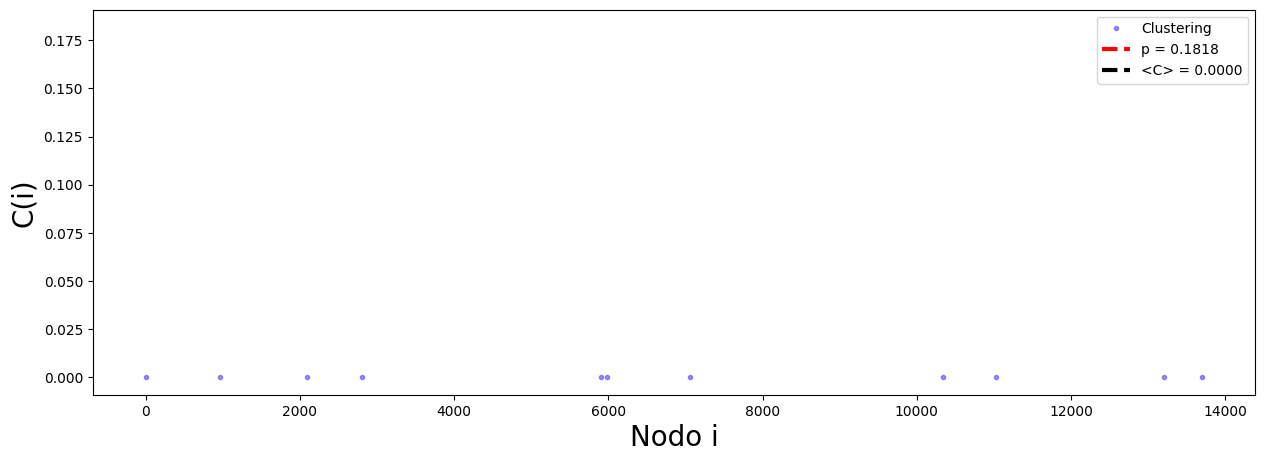

In [33]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('Nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

plt.show()